- ## 요약
    1. 하이퍼 파라미터 튜닝
        1. 그리드 탐색
        2. 랜덤 탐색
    2. Batch Normalization
    3. Softmax Regression
    4. Tensorflow

    

- ## 파라미터 튜닝
    - 고정적인 그리드를 사용하는 대신에 동일한 갯수의 랜덤 값을 사용할 것
    - 최적의 값이 존재한다고 예상되는 영역을 지정한 후 해당 영역 내의 랜덤값 사용

    - 적절한 스케일 사용
        - 고정된 값에 따라 영역을 나누지 않고, 하이퍼 파라미터 종류에 맞게 적절하게 영역을 나눠 배분할 것
            - $\beta$ 의 경우
                - 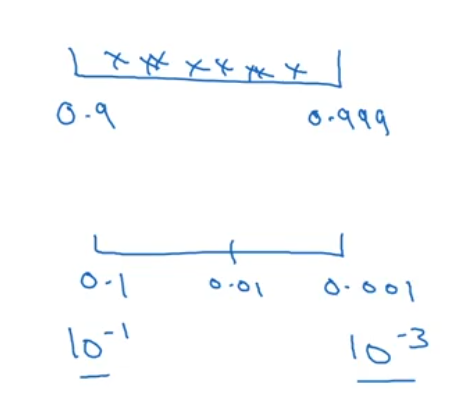
        
    - 접근법
        - 병렬 훈련
            - 다른 하이퍼파라미터를 병렬적으로 훈련시킴
        - babysitting
            - 주기적으로 신경망 훈련상태를 확인하며 하이퍼파라미터 상의 문제가 확인될 경우 수정함
        


- ## Batch Normalization
    - 입력 데이터를 정규화해 찌그러진 형태의 손실 함수를 원형으로 변형하여 최적화 경로를 개선하고 학습속도를 향상하듯이
    - 입력 데이터로 들어가는 이전 신경망의 출력 $z^{[l]}$ 또한 정규화하여 마찬가지 효과를 낼 수 있다.

    - 활성화 함수 이전 값 $z^{[l]}$을 정규화할지, 이후 값 $a^{[l]}$을 정규화할지는 이견이 있으나 보통 $z^{[l]}$ 을 정규화한다   

    - 과정
        - 활성화 함수 통과 전의 값에 대해
        1. $\mu = \frac{1}{m} \sum_i z^{(i)}$
            - 산술평균 구하기
        2. $\sigma^2 = \frac{1}{m} \sum_i (z^{(i)} - \mu)^2$
            - 분산 구하기
        3. $z_{\text{norm}}^{(i)} = \frac{z^{(i)} - \mu}{\sqrt{\sigma^2 + \epsilon}}$
            - 매우 작은 값 $\epsilon$ 을 분산에 더하고 정규분포 식으로 변형
        4. $\tilde{z}^{(i)} = \gamma z_{\text{norm}}^{(i)} + \beta$
            - $\gamma, \beta$ 는 정규화된 값을 변형하기 위한 학습가능 파라미터임


- ## 식 변형 과정
    1. l 번쨰 레이어 $z^{[l]}$ 에 대해 배치 노멀라이즈하여 $\tilde{z}^{[l]}$ 로 변형
    2. 이를 활성화 함수에 넣어 $ a^{[l]} = g(\tilde{Z}^{[l]}) $ 구함
    3. 같은 방식으로 다음 레이어 구함
    - 이 떄 신경망은 레이어마다 추가적인 파라미터 $\beta^{[l]}$,$\gamma^{[l]}$ 를 레이어마다 가지게 된다
    - adam에서 사용하는 $\beta_1, \beta_2$ 와 헷갈리지 말것
    - 기존에 레이어에 존재하던 bias $b^{[l]}$ 은 정규화 과정에서 의미 없는 파라미터로 변하므로 0으로 설정할 것
    - $\beta^{[l]}, \gamma^{[l]}$ 행렬의 크기는 기존 가중치 $w^{[l]}$ 과 편향 $b^{[l]}$ 의 크기와 같은 $(n^{[l]},1)$ 이다

- ## Batch Normalization 효과
    - 공변량 변화 감소
        - 입력 데이터 분포가 일정하게 유지돼면서 학습을 안정적으로 진행 할 수 있음
    - 정규화 효과
        - 계산 과정에서 작은 노이즈를 추가하게 돼 약간의 일반화 효과가 있음


- ### 코드 적용법
    - 뮤와 시그마 제곱 단위로 벡터화 후 정규화 값 구함

- Softmax Regression
    - 두개의 클래스를 구분하는 이진 분류와는 다르게 다중 클래스에 대해 확률을 계산하는 분류 방식임
    - 활성화 함수 
        - 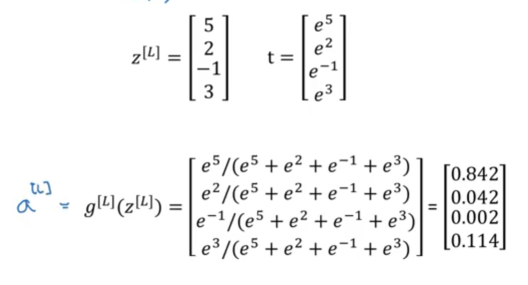
        1. $t=e^{(z^{[l]})}$
        2. $ a^{[l]} = \frac{e^{z^{[l]}}}{\sum_{j=1}^{K} t_j} = g^{[l]}(z^{[l]}) $
        - 출력값은 해당 레이블일 확률의 형태로 합이 1인 행렬로 나온다.

    - softmax classifier
        - hard max
            - 가장 높은 확률을 1로 만들고 다른 값을 0 으로 만듬
            - 소프트맥스 함수의 출력이 정답 레이블과 곱해지면서 바뀜
        - 손실 함수 계산
            - 크로스 엔트로피 손실 함수
            - $ \mathcal{L}(\hat{y}, y) = - \sum_{j=1}^{C} y_j \log \hat{y}_j $
            - $ J(w^{(l)}, b^{(l)}, \dots) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) $
            - 정답 $y^{(i)}$ 와 예측치 $\hat{y}^{(i)}$ 을 통해 정답에 해당돼는 확률을 전부 더한 뒤, 훈련 데이터의 갯수로 나눠 손실 함수 값의 평균을 구한것임
            
            - 수식 과정
                1. 정답 $y^{(i)}$ 을 정답만 1이고 나머지는 0인 원-핫 벡터 형태로 바꾼후 행렬형태로 나열해 행렬 $Y$ 를 만듬
                    - 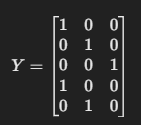
                    - 해당 행렬은 다섯개의 훈련 데이터셋에 정답 레이블은 세개인 정답 행렬임
                2. $y^{(i)}$  와 $\hat{y}^{(i)}$ 를 비용함수에 넣어 값을 구함
            

        - 역전파
            - $dz^{[L]} = \hat{y}-y$ 임
            - 해당 식으로 구할것

In [1]:
import numpy as np
import tensorflow as tf


w = tf.Variable(0, dtype=tf.float32)

optimizer = tf.keras.optimizers.Adam(0.1)

def train_step():
    with tf.GradientTape() as tape:
        cost = w**2 - 10 * w + 25
    trainable_variables = [w]
    grads= tape.gradient(cost,trainable_variables)
    optimizer.apply_gradients(zip(grads,trainable_variables))
print(w)

2025-03-20 18:13:02.031914: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-20 18:13:02.193282: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742494382.248374   42852 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742494382.264934   42852 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742494382.395716   42852 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>


I0000 00:00:1742494385.620974   42852 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 21458 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


In [2]:
train_step()
print(w)
# 순전파만 정의하면 역전파는 텐서플로우가 알아서 함

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0999993085861206>


In [3]:
for i in range(1000):
    train_step()
    
print(w)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.000000953674316>
